# Stats comparison for select variables

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [5]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [6]:
from pathlib import Path
from utils.variable import Variable_Lev_Metadata
import numpy as np
import pickle

import matplotlib.pyplot as plt
import cmocean
import seaborn as sns

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [34]:
# PROJECT_ROOT = Path.cwd().parent.resolve()
PROJECT_ROOT = Path("/p/scratch/icon-a-ml/kuehbacher1")

dirs = [os.path.join("eval_nando", "causal_single_nn", "models_arch-rasp_thrs-opt-mse6"), 
       # "training_74_pre_mask_net_spars0.001", 
       # "training_75_mask_net_bespoke_thresholds", 
       # "training_76_mask_net_prediction_thresholds"
        # "training_88_mask_net_prediction_thresholds_spars1.0", 
        # "training_89_mask_net_prediction_thresholds_spars0.1", 
        # "training_90_mask_net_prediction_thresholds_spars0.01", 
        "training_91_mask_net_prediction_thresholds_spars0.001", 
        "training_92_mask_net_prediction_thresholds_spars1e-4", 
        "training_93_mask_net_prediction_thresholds_spars1e-5", 
       ]


stats_file = "hor_stats.p"

In [35]:
def load_stats_dict(directories):
    stats_dicts = dict()
    
    for dir in directories:

        plot_dir = os.path.join(PROJECT_ROOT, "output_castle", dir, "plots_offline_evaluation")


        if "prediction_thresholds" in dir:
            for suffix in ["_val", "_train"]:
                load_dir = os.path.join(plot_dir, "stats" + suffix, "range-1440")
                
                with open(os.path.join(load_dir, stats_file), "rb") as f:
                    values = pickle.load(f)
                print(f"\nLoaded file: {os.path.join(load_dir, stats_file)}")
                
                stats_dicts[dir + suffix] = values

        else: 
            dict_file = Path(plot_dir, "stats", "range-1440", stats_file)
            
            with open(dict_file, "rb") as f:
                values = pickle.load(f)
            print(f"\nLoaded file: {dict_file}")

            stats_dicts[dir] = values
        
    return stats_dicts

In [36]:
stats_dicts = load_stats_dict(dirs)


Loaded file: /p/scratch/icon-a-ml/kuehbacher1/output_castle/eval_nando/causal_single_nn/models_arch-rasp_thrs-opt-mse6/plots_offline_evaluation/stats/range-1440/hor_stats.p

Loaded file: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_91_mask_net_prediction_thresholds_spars0.001/plots_offline_evaluation/stats_val/range-1440/hor_stats.p

Loaded file: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_91_mask_net_prediction_thresholds_spars0.001/plots_offline_evaluation/stats_train/range-1440/hor_stats.p

Loaded file: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_92_mask_net_prediction_thresholds_spars1e-4/plots_offline_evaluation/stats_val/range-1440/hor_stats.p

Loaded file: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_92_mask_net_prediction_thresholds_spars1e-4/plots_offline_evaluation/stats_train/range-1440/hor_stats.p

Loaded file: /p/scratch/icon-a-ml/kuehbacher1/output_castle/training_93_mask_net_prediction_thresholds_spars1e-5/plots_offline_eval

In [37]:
var_names = ["tphystnd-445.99", "tphystnd-691.39", "tphystnd-820.86", "phq-445.99", "phq-691.39", "phq-820.86", 
             "fsnt", "fsns", "flnt", "flns", "prect"]

In [38]:
def parse_label(dir_str):
    if dir_str == os.path.join("eval_nando", "causal_single_nn", "models_arch-rasp_thrs-opt-mse6"):
        return "CausalSingleNN"
    elif dir_str == "training_74_pre_mask_net_spars0.001":
        return "PreMaskNet, lpred=0.001"
    elif dir_str =="training_75_mask_net_bespoke_thresholds":
        return "MaskNet, reference thresholds"
    elif dir_str == "training_76_mask_net_prediction_thresholds_val":
        return "MaskNet, val performance threshold"
    elif dir_str == "training_76_mask_net_prediction_thresholds_train":
        return "MaskNet, train performance threshold"
        
    elif "training_88_mask_net_prediction_thresholds_spars1.0_train" in dir_str: 
        return "MaskNet, train thresholds, ls=1.0, 1e-4-70perc"
    elif "training_88_mask_net_prediction_thresholds_spars1.0_val" in dir_str: 
        return "MaskNet, val thresholds, ls=1.0, 1e-4-70perc"
    elif "training_89_mask_net_prediction_thresholds_spars0.1_train" in dir_str: 
        return "MaskNet, train thresholds, ls=0.1, 1e-4-70perc"
    elif "training_89_mask_net_prediction_thresholds_spars0.1_val" in dir_str: 
        return "MaskNet, val thresholds, ls=0.1, 1e-4-70perc"
    elif "training_90_mask_net_prediction_thresholds_spars0.01_train" in dir_str: 
        return "MaskNet, train thresholds, ls=0.01, 1e-4-70perc"
    elif "training_90_mask_net_prediction_thresholds_spars0.01_val" in dir_str: 
        return "MaskNet, val thresholds, ls=0.01, 1e-4-70perc"
    elif "training_91_mask_net_prediction_thresholds_spars0.001_train" in dir_str: 
        return "MaskNet, train thresholds, ls=0.001, 1e-4-70perc"
    elif "training_91_mask_net_prediction_thresholds_spars0.001_val" in dir_str: 
        return "MaskNet, val thresholds, ls=0.001, 1e-4-70perc"
    elif "training_92_mask_net_prediction_thresholds_spars1e-4_train" in dir_str: 
        return "MaskNet, train thresholds, ls=1e-4, 1e-4-70perc"
    elif "training_92_mask_net_prediction_thresholds_spars1e-4_val" in dir_str: 
        return "MaskNet, val thresholds, ls=1e-4, 1e-4-70perc"
    elif "training_93_mask_net_prediction_thresholds_spars1e-5_train" in dir_str: 
        return "MaskNet, train thresholds, ls=1e-5, 1e-4-70perc"
    elif "training_93_mask_net_prediction_thresholds_spars1e-5_val" in dir_str: 
        return "MaskNet, val thresholds, ls=1e-5, 1e-4-70perc"
    else:
        raise ValueError(f"Unknown directory string {dir_str}")

In [39]:
metric = "r2"

/tmp/ipykernel_9398/1554565070.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


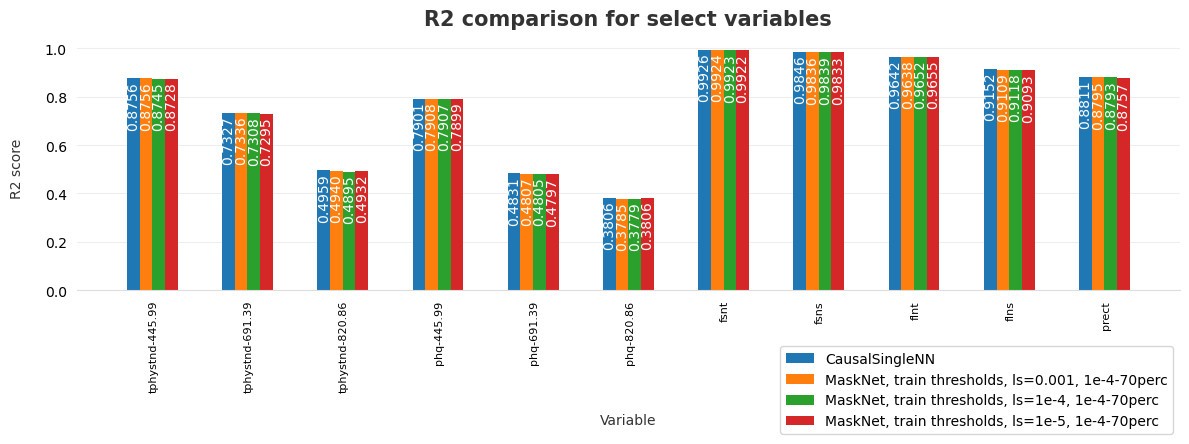

In [40]:
plt.close()

fig, ax = plt.subplots()
fig.set_figwidth(12)

width = 0.2  # the width of the bars
multiplier = 0

x = np.arange(len(var_names))
new_x = np.array([1.5*i for i in x])

for dir, stats_d in stats_dicts.items():
    if "_train" in dir or "causal" in dir: 
        label = parse_label(dir)
        
        bar_values = [stats_d[v]["hor_" + metric]for v in var_names]
        
        offset = width * multiplier
        
        bars = ax.bar(new_x + offset, bar_values, width=width, label=label, align='center')
        ax.bar_label(bars, rotation=90, fmt="{:.4f}", padding=-37, color='white',)
    
        multiplier += 1


ax.set_xticks(new_x + multiplier*width/2)
ax.set_xticklabels(var_names, rotation=90, ha='right', va='top')

ax.set_ylim(bottom=0.0, top=1.01)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.tick_params(axis='x', labelsize=8)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.margins(x=0.05)

# ax.legend()
ax.legend(bbox_to_anchor=(1, -0.2))


# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Variable', labelpad=15, color='#333333')
ax.set_ylabel('R2 score', labelpad=15, color='#333333')

title_text = 'R2 comparison for select variables'
ax.set_title(title_text, pad=15, color='#333333', weight='bold', fontsize=15)

fig.tight_layout()

fig.show()

save_dir = os.path.join(PROJECT_ROOT, "output_castle", "training_91_mask_net_prediction_thresholds_spars0.001", 
                        "plots_offline_evaluation", "select_metric_comparison")
Path(save_dir).mkdir(exist_ok=True, parents=True)

# save_png = metric + "_comparison_select_variables.png"
# plt.savefig(os.path.join(save_dir, save_png), dpi=400, bbox_inches="tight")
# print(f'\nSaving plot {Path(*Path(os.path.join(save_dir, save_png)).parts[-4:])}.')
    

In [30]:
output_variables = [str(v) for v in stats_dicts[os.path.join("eval_nando", "causal_single_nn", 
                                                             "models_arch-rasp_thrs-opt-mse6" )].keys()]

In [23]:
output_variables = output_variables[58:]

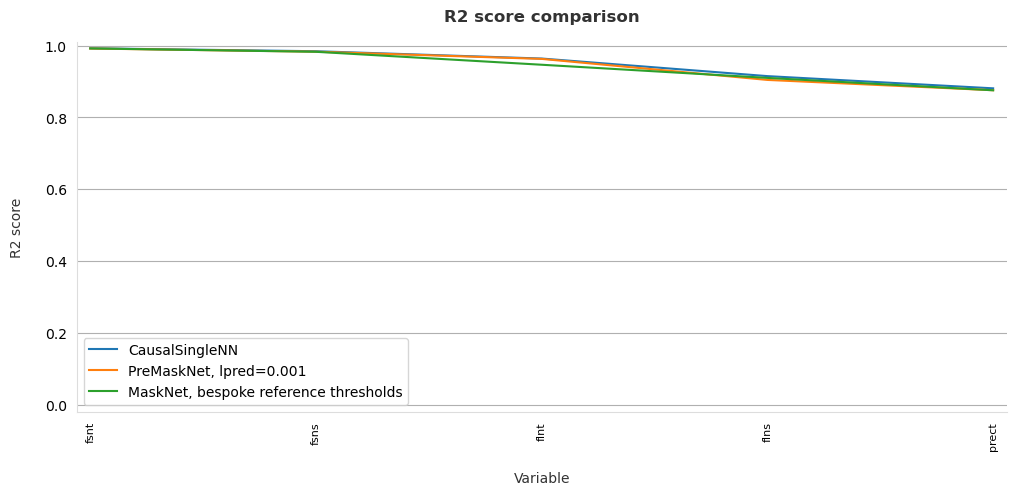

In [24]:
plt.close()
fig, ax = plt.subplots()
fig.set_figwidth(12)


x = range(len(output_variables))

for dir, stats_d in stats_dicts.items():
    label = parse_label(dir)
    
    y = [stats_d[v]["hor_" + metric]for v in output_variables]
    sns.lineplot(x=x, y=y, label=label, ax=ax)
    
plt.legend()

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=10)
ax.set_axisbelow(True)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.margins(x=0.015)

ax.set_ylim(bottom=-0.02, top=1.01)

ax.set_xticks(range(len(output_variables)))
ax.set_xticklabels(output_variables, rotation=90, ha='center', va='top')
    
ax.set_xlabel('Variable', labelpad=15, color='#333333')
ax.set_ylabel('R2 score', labelpad=15, color='#333333')

ax.set_title('R2 score comparison', pad=15, color='#333333', weight='bold', fontsize=12)

plt.show()